# CASE STUDY: Predicting The Likelihood of E-signing a loan based on financial History

# Mfonobong Isine

# Probem Statement

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('financial_data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


# Data Cleaning

In [6]:
dataset.isna().any() #returns all the columns that has any missing values

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

# Histograms

In [7]:
#create new dataset and drop categorical columns which we dont need in our histograms
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

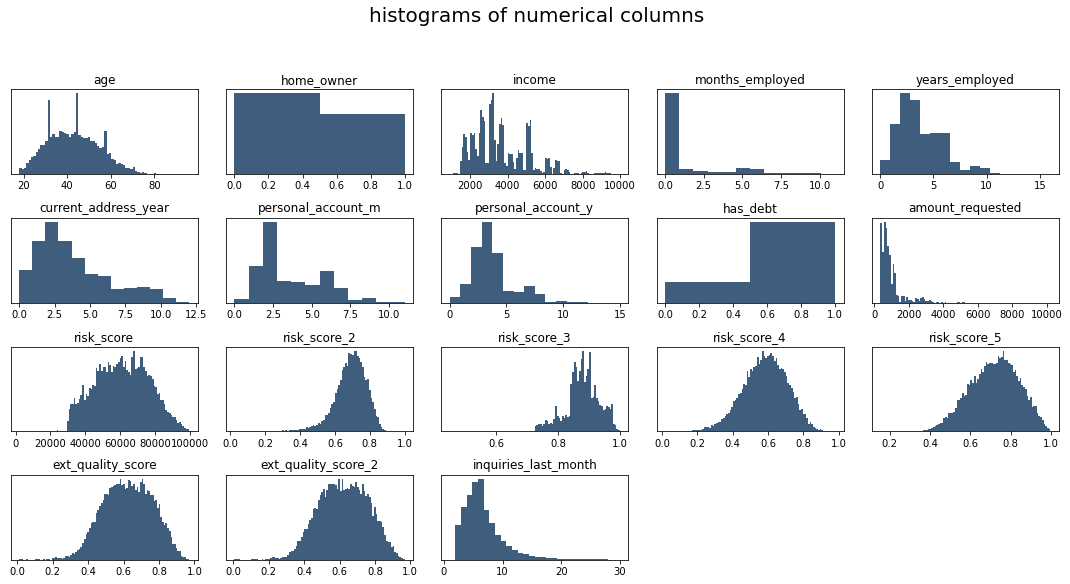

In [8]:
#histograms
fig = plt.figure(figsize = (15, 12))
plt.suptitle('histograms of numerical columns', fontsize = 20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False) #we set the y values to false because we dont want to be overwelhmed
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    if vals >= 100:
        vals = 100 
    plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #to avoid overlapping

# Correlation

<AxesSubplot:title={'center':'Correlation with E Signed'}>

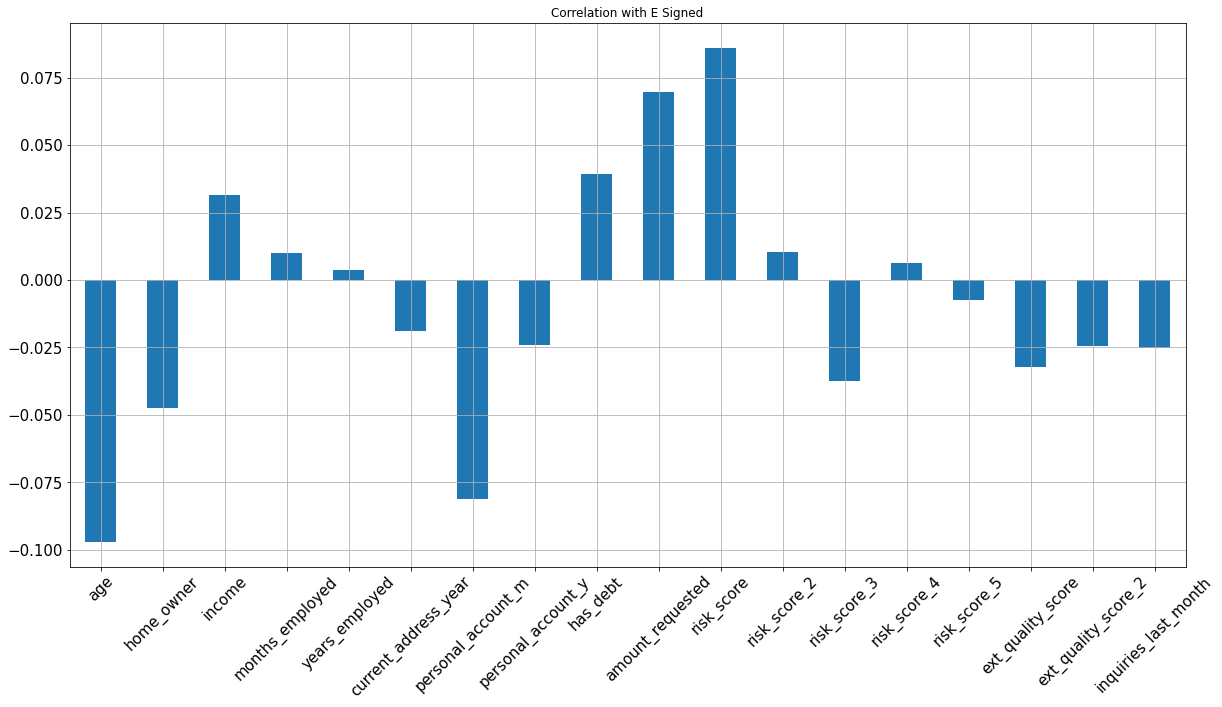

In [9]:
dataset2.corrwith(dataset.e_signed).plot.bar(figsize = (20, 10), title = 'Correlation with E Signed', fontsize = 15, rot = 45, grid = True)

# Correlation Matrix

<AxesSubplot:>

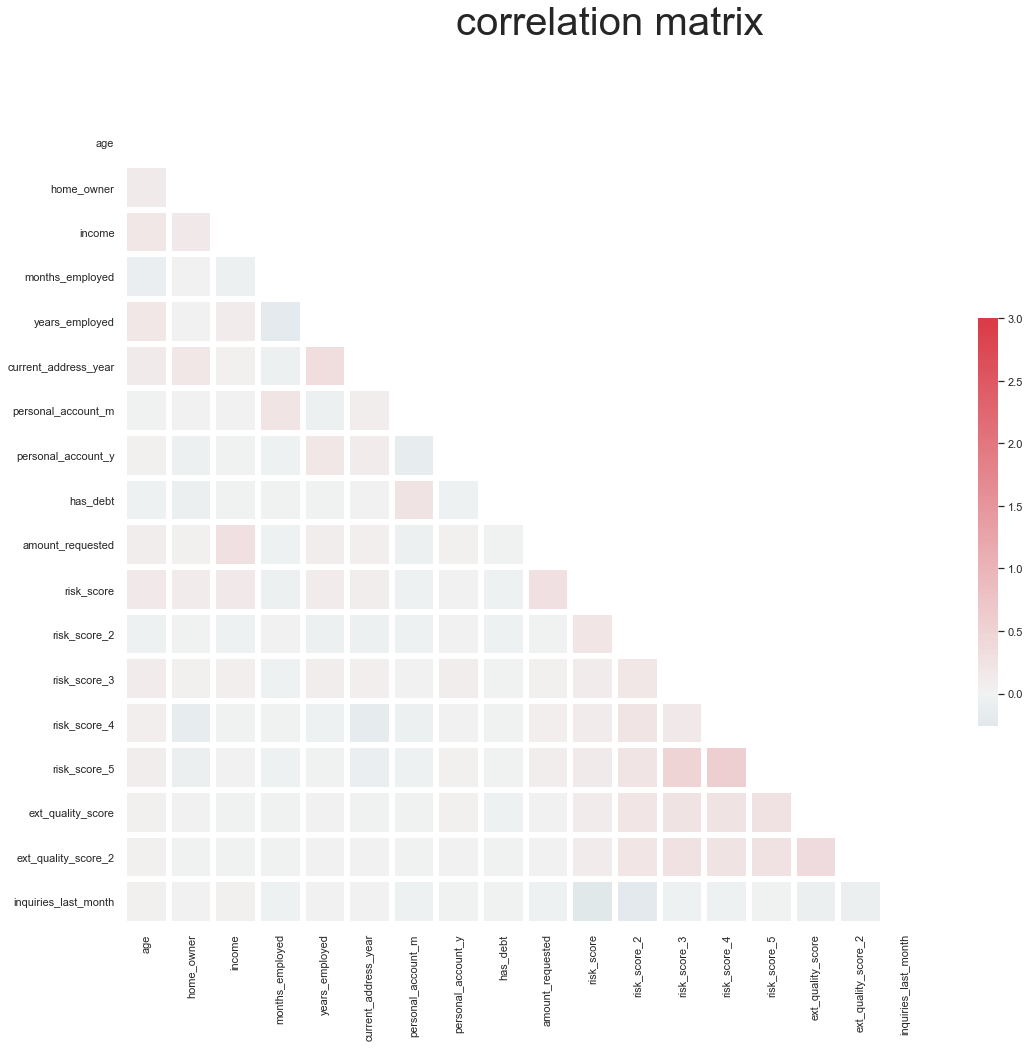

In [10]:
sns.set(style = 'white')

#compute the correlation matrix
corr = dataset2.corr() 

#generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#set up the matplotlib figure
f, ax = plt.subplots(figsize = (18, 15))
f.suptitle('correlation matrix', fontsize = 40)

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#Draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 3, center = 0,
            square = True, linewidths = 5, cbar_kws = {'shrink': .5})


# Feuture Engineering

In [11]:
import random
import time

In [12]:
dataset = pd.read_csv('financial_data.csv')
random.seed(100)

In [13]:
dataset = dataset.drop(columns = ['months_employed']) #drop month_employed colummn

In [14]:
#multiply personal account years with 12 to get its value in months then add the result to personal account months column
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))

In [15]:
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [16]:
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

# One Hot Encoding

In [17]:
#finds all the categorical columns and is going to encode them into their own dummy variable
dataset = pd.get_dummies(dataset)

In [18]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [19]:
#drop one of the dummy variable columns to avoid getting into the dummy variable trap
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [20]:
#Removing extra columns
response = dataset['e_signed']

In [21]:
users = dataset['entry_id']

In [22]:
dataset = dataset.drop(columns = ['e_signed', 'entry_id'])

In [23]:
#splitting into train and test
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

In [25]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [26]:
sc_x = StandardScaler()

In [27]:
sc_x.fit_transform(x_train)

array([[-0.00599126, -0.85634884, -0.24235846, ..., -1.22463801,
        -0.30236006,  1.97682704],
       [-0.50989022, -0.85634884, -0.05259224, ..., -1.22463801,
         3.30731512, -0.50586115],
       [-0.7618397 ,  1.16774842, -0.41214928, ...,  0.81656783,
        -0.30236006, -0.50586115],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ...,  0.81656783,
        -0.30236006, -0.50586115],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -1.22463801,
        -0.30236006, -0.50586115],
       [-0.7618397 , -0.85634884, -0.36554004, ...,  0.81656783,
        -0.30236006, -0.50586115]])

In [28]:
#convert to pandas dataframe because applying the standard scaler function makes us loose the columns names and indexes
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))

In [29]:
x_test2 = pd.DataFrame(sc_x.fit_transform(x_test))

In [30]:
#copy lost column names from the previous dataframe to this new one
x_train2.columns = x_train.columns.values

In [31]:
x_test2.columns = x_test.columns.values

In [32]:
#copy lost indexes from the previous dataframe to this new one
x_train2.index = x_train.index.values

In [33]:
x_test.index = x_test.index.values

In [34]:
#set x_train2 to x_train just to keep things consistent
x_train = x_train2
x_test = x_test2

# Model Building

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
classifier = LogisticRegression(random_state = 0)

In [37]:
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [38]:
#predicting test set
y_pred = classifier.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [40]:
acc = accuracy_score(y_test, y_pred)

In [41]:
prec = precision_score(y_test, y_pred)

In [42]:
rec = recall_score(y_test, y_pred)

In [43]:
f1 = f1_score(y_test, y_pred)

In [44]:
results = pd.DataFrame([['linear Regression', acc, prec, rec, f1]], columns = ['model', 'accuracy', 'precision', 'recall', 'f1 score'])

In [45]:
 results

,model,accuracy,precision,recall,f1 score
0,linear Regression,0.563372,0.577844,0.700726,0.63338


# SVM linear

In [46]:
from sklearn.svm import SVC

In [47]:
classifier = SVC(random_state = 0, kernel = 'rbf')

In [48]:
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [49]:
#predicting test set
y_pred = classifier.predict(x_test)

In [50]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [51]:
model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]], columns = ['model', 'accuracy', 'precision', 'recall', 'f1 score'])

In [52]:
results = results.append(model_results, ignore_index = True)

In [53]:
results

,model,accuracy,precision,recall,f1 score
0,linear Regression,0.563372,0.577844,0.700726,0.633380
1,SVM (RBF),0.592686,0.607519,0.687241,0.644926


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')

classifier.fit(x_train, y_train)

#predicting test set
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n = 100)', acc, prec, rec, f1]], columns = ['model', 'accuracy', 'precision', 'recall', 'f1 score'])
results = results.append(model_results, ignore_index = True)

In [55]:
results

,model,accuracy,precision,recall,f1 score
0,linear Regression,0.563372,0.577844,0.700726,0.633380
1,SVM (RBF),0.592686,0.607519,0.687241,0.644926
2,Random Forest (n = 100),0.623953,0.643741,0.674793,0.658901


# K-fold Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score

In [58]:
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print('Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)' % (accuracies.mean(), accuracies.std() *2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


# Parameter Tuning

In [59]:
#Applying Grid Search

#Round 1: Entropy
parameters = {'max_depth': [3, None],
             'max_features': [1, 5, 10],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10],
             'bootstrap': [True, False],
             'criterion': ['entropy']}



In [60]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)

In [61]:

t0 = time.time() #to check how long it will take for your computer to run this
grid_search = grid_search.fit(x_train, y_train)
t1 = time.time()
print('took %0.2f seconds' % (t1 - t0))

took 3655.95 seconds


In [62]:
rf_best_accuracy = grid_search.best_score_

In [63]:
rf_best_parameters = grid_search.best_params_

In [65]:
rf_best_accuracy, rf_best_parameters

(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [66]:
#predicting test set
y_pred = grid_search.predict(x_test)

In [67]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n = 100, Grid search + Entropy)', acc, prec, rec, f1]], columns = ['model', 'accuracy', 'precision', 'recall', 'f1 score'])
results = results.append(model_results, ignore_index = True)

In [68]:
results

,model,accuracy,precision,recall,f1 score
0,linear Regression,0.563372,0.577844,0.700726,0.633380
1,SVM (RBF),0.592686,0.607519,0.687241,0.644926
2,Random Forest (n = 100),0.623953,0.643741,0.674793,0.658901
3,"Random Forest (n = 100, Grid search + Entropy)",0.630095,0.645582,0.693465,0.668667


# Formatting Final Results

In [70]:
final_results = pd.concat([y_test, users], axis = 1).dropna()

In [71]:
final_results

,e_signed,entry_id
8,1.0,6493191
9,1.0,8908605
12,1.0,6889184
16,0.0,9375601
18,1.0,8515555
...,...,...
17881,1.0,5028251
17888,0.0,8958068
17890,0.0,3605941
17901,0.0,1807355


In [73]:
#add predictions our predictions column
final_results['predictions'] = y_pred

In [74]:
final_results

,e_signed,entry_id,predictions
8,1.0,6493191,0
9,1.0,8908605,0
12,1.0,6889184,0
16,0.0,9375601,1
18,1.0,8515555,1
...,...,...,...
17881,1.0,5028251,0
17888,0.0,8958068,0
17890,0.0,3605941,1
17901,0.0,1807355,0


In [75]:
#reorder the table to make it more easier to read
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [76]:
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,0
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,0
17888,8958068,0.0,0
17890,3605941,0.0,1
17901,1807355,0.0,0
